## Adaptive BM and piechart nodes

In [1]:
import pandas as pd
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt

from pyballmapper import BallMapper

### Let's use MNIST

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target
print(X.shape)

(1797, 64)


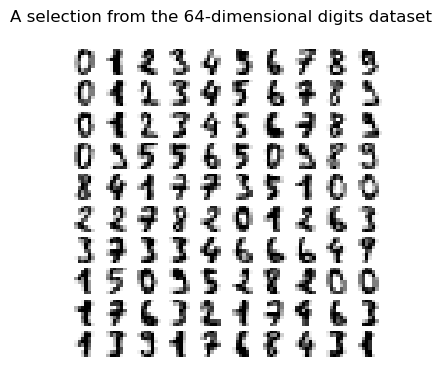

In [3]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(4, 4))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")

fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=12)

plt.show()

## Standard BM

In [4]:
bm = BallMapper(X=X, eps=30, verbose="tqdm")

Finding vertices...


  0%|          | 0/1797 [00:00<?, ?it/s]

162 vertices found.
Computing points_covered_by_landmarks...


  0%|          | 0/162 [00:00<?, ?it/s]

Running BallMapper 
Finding edges...


0it [00:00, ?it/s]

Creating Ball Mapper graph...
Done


<Axes: >

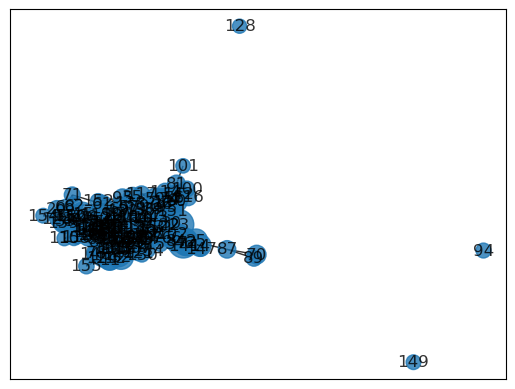

In [5]:
bm.draw_networkx()

In [6]:
# this cell allows for bokeh plots to be displayed inside jupyter notebooks
from bokeh.io import output_notebook, reset_output

reset_output()
output_notebook()

Loading BokehJS ...

The coloring variable is categorical, therefore it does not really make sense to color by average. We can use the following function to place a pie chart at each node.

Use the + and - buttons to change the ball radiuses.

In [7]:
import pyballmapper.plotting as bmplot
import networkx as nx
import bokeh
from bokeh.io import show, save

partitions = bmplot.generate_partitions(
    {
        node: bm.points_covered_by_landmarks[node]
        for node in bm.points_covered_by_landmarks
    },
    {i: v for i, v in enumerate(y)},
)

pie_plot = bmplot.pie_graph_plot(
    partitions,
    g=bm.Graph,
    graph_layout=nx.spring_layout(bm.Graph, iterations=100, seed=42),
    node_scaling="new",  # different node scaling algos, try also "old"
    plot_height=600,
    plot_width=800,
    palette=bokeh.palettes.d3["Category10"][min(len(np.unique(y)), 20)],
)

# save(pie_plot, "pie_plot.html")

show(pie_plot)

## Adaptive BM

In addition to `eps` we can specify a `max_size`. If a ball contains more points than `max_size`, decrease the radious by a factor `eta` and recompute the points covered by the smaller ball.  

In [8]:
bm = BallMapper(X=X, eps=30, verbose="tqdm", method="adaptive", max_size=50, eta=0.9)

Finding vertices...


  0%|          | 0/1797 [00:00<?, ?it/s]

ball 0 - point 0  has size 155. decreasing eps to 27.0
ball 0 - point 0  has size 136. decreasing eps to 24.3
ball 0 - point 0  has size 105. decreasing eps to 21.87
ball 0 - point 0  has size 64. decreasing eps to 19.683
ball 1 - point 1  has size 71. decreasing eps to 27.0
ball 3 - point 3  has size 70. decreasing eps to 27.0
ball 6 - point 6  has size 77. decreasing eps to 27.0
ball 6 - point 6  has size 53. decreasing eps to 24.3
ball 10 - point 10  has size 121. decreasing eps to 27.0
ball 10 - point 10  has size 79. decreasing eps to 24.3
ball 13 - point 13  has size 108. decreasing eps to 27.0
ball 13 - point 13  has size 73. decreasing eps to 24.3
ball 14 - point 14  has size 66. decreasing eps to 27.0
ball 23 - point 30  has size 107. decreasing eps to 27.0
ball 23 - point 30  has size 73. decreasing eps to 24.3
ball 24 - point 39  has size 116. decreasing eps to 27.0
ball 24 - point 39  has size 58. decreasing eps to 24.3
ball 25 - point 49  has size 133. decreasing eps to 27

0it [00:00, ?it/s]

Creating Ball Mapper graph...
Done


In [9]:
import pyballmapper.plotting as bmplot
import networkx as nx
import bokeh
from bokeh.io import show, save

partitions = bmplot.generate_partitions(
    {
        node: bm.points_covered_by_landmarks[node]
        for node in bm.points_covered_by_landmarks
    },
    {i: v for i, v in enumerate(y)},
)

pie_plot = bmplot.pie_graph_plot(
    partitions,
    g=bm.Graph,
    graph_layout=nx.spring_layout(bm.Graph, iterations=100, seed=42),
    node_scaling="new",
    plot_height=600,
    plot_width=800,
    palette=bokeh.palettes.d3["Category10"][min(len(np.unique(y)), 20)],
)

# save(pie_plot, "pie_plot.html")

show(pie_plot)